## Weak diffuse interstellar bands

This notebook demonstrates a procedure for masking diffuse interstellar bands.

The method is simple: we create a dataset of low extinction stars ```spectra_low``` and a dataset of high extinction stars ```spectra_high```. We then find the pca basis for ```spectra_low```, this basis which does not contain any stars with extinction will not capture those features in the spectra. We can then identify diffuse interstellar bands by finding those wavelength regions where the ```spectra_high``` data is poorly fit by the ```spectra_low``` pca basis.  


In [1]:
%load_ext autoreload
%autoreload 2
import apoNN.src.data as apoData
import apoNN.src.utils as apoUtils
import apoNN.src.vectors as vectors
import apoNN.src.fitters as fitters
import apoNN.src.evaluators as evaluators
import apoNN.src.occam as occam_utils


import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import random
from ppca import PPCA
import inspect

[(['TEFF', 'LOGG', 'LOG10VDOP', 'METALS', 'C', 'N', 'O Mg Si S Ca Ti'], ['C', 'N', 'O', 'Na', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'V', 'Mn', 'Fe', 'Ni'], ['[C/M]', '[N/M]', '[O/M]', '[Na/H]', '[Mg/M]', '[Al/H]', '[Si/M]', '[S/M]', '[K/H]', '[Ca/M]', '[Ti/M]', '[V/H]', '[Mn/H]', '[Fe/H]', '[Ni/H]'], [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])]


In [4]:
import apogee.tools.path as apogee_path
apogee_path.change_dr(16)

In [5]:
n_start = 0
n_stars = 100000
d = 100 #number of dimensions to use for compression
tol = 0.01 # tolerance to use for PPCA. Larger means faster but less accurate

In [6]:
allStar = apoUtils.load("shuffled_allStar")


In [7]:
upper_temp_cut = allStar["Teff"]<5000
lower_temp_cut = allStar["Teff"]>4000
lower_g_cut = allStar["logg"]>1.5
upper_g_cut = allStar["logg"]<3.
low_extinction_cut = allStar["AK_TARG"]<0.005
#high_extinction_cut = (0.4<allStar["AK_TARG"]) & (allStar["AK_TARG"]<0.5) 
high_extinction_cut = (0.5<allStar["AK_TARG"]) & (allStar["AK_TARG"]<8.0) 


occam_low = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & low_extinction_cut
allStar_occam_low =  allStar[np.where(occam_low)]

occam_high = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & high_extinction_cut
allStar_occam_high =  allStar[np.where(occam_high)]

occamlike = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut
allStar_occamlike = allStar[np.where(occamlike)]

In [8]:
np.mean(allStar_occamlike["AK_TARG"]<0.5)

0.9391805377720871

In [9]:
data_low = apoData.Dataset(allStar_occam_low)


In [10]:
data_high = apoData.Dataset(allStar_occam_high)


In [ ]:
spectra_low = apoData.infill_masked_spectra(data_low.masked_spectra,data_low.masked_spectra[0:500])

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum interpolated...
new spectrum i

In [ ]:
spectra_high = apoData.infill_masked_spectra(data_high.masked_spectra,data_low.masked_spectra[0:500])

In [ ]:
occam = occam_utils.Occam()
occam_kept = occam.cg_prob>0.8
allStar_occam,cluster_idxs = occam_utils.prepare_occam_allStar(occam_kept,allStar_occamlike)
data_occam = apoData.Dataset(allStar_occam)
spectra_occam = apoData.infill_masked_spectra(data_occam.masked_spectra,data_low.masked_spectra[0:500])

In [ ]:
n_stars = 10000
n_start = 0
data_occamlike = apoData.Dataset(allStar_occamlike[n_start:n_start+n_stars])
spectra_occamlike = apoData.infill_masked_spectra(data_occamlike.masked_spectra,data_low.masked_spectra[0:500])

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=30)

In [26]:
pca.fit(spectra_low)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
rec_spec_low =  pca.inverse_transform(pca.transform(spectra_low))

In [28]:
rec_spec_high =  pca.inverse_transform(pca.transform(spectra_high))

In [29]:
np.mean((spectra_low-rec_spec_low)**2)

0.00012103185

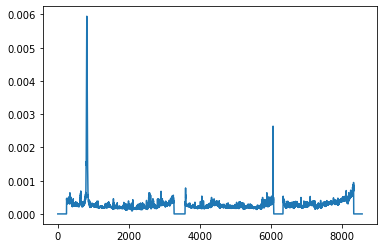

In [30]:
plt.plot(np.mean((spectra_high-rec_spec_high)**2,axis=0))

In [31]:
from apogee.tools import air2vac, atomic_number,apStarWavegrid

In [32]:
diff_res = np.mean((np.abs(spectra_high-rec_spec_high)),axis=0)-np.mean((np.abs(spectra_low-rec_spec_low)),axis=0)
#diff_res = np.mean((np.abs(spectra_high-rec_spec_high)),axis=0)


In [33]:
diff_res

array([3.724191e-07, 6.534657e-08, 6.041936e-08, ..., 0.000000e+00,
       0.000000e+00, 0.000000e+00], dtype=float32)

(4300, 4600)

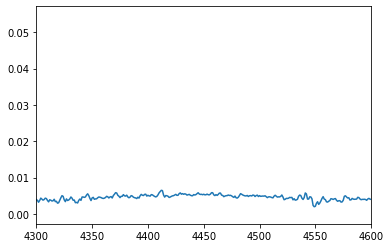

In [34]:
plt.plot(diff_res)
plt.xlim(4300,4600)

In [38]:
mask_interstellar, interstellar_locs = apoUtils.get_interstellar_bands()

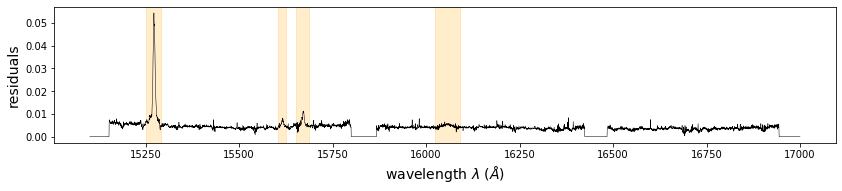

In [47]:
plt.figure(figsize=[14,3])
plt.plot(apStarWavegrid(),diff_res,color="black",linewidth=0.5)
alpha_loc = 0.2
for loc in interstellar_locs:
    plt.axvspan(apStarWavegrid()[loc[0]],apStarWavegrid()[loc[1]],color="orange",alpha = alpha_loc)
plt.ylabel("residuals",fontsize=14)
plt.xlabel(r"wavelength $\lambda$ $(\AA)$",fontsize=14)
wav =15600
wind = 100
#plt.xlim(wav-wind,wav+wind)
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("../../figures/diffuse_interstellar.pdf",format="pdf")


In [ ]:
plt.figure(figsize=[14,3])
plt.plot(apStarWavegrid(),diff_res,color="black",linewidth=0.5)
alpha_loc = 0.2
for loc in interstellar_locs:
    plt.axvspan(apStarWavegrid()[loc[0]],apStarWavegrid()[loc[1]],color="orange",alpha = alpha_loc)
plt.ylabel("residuals",fontsize=14)
plt.xlabel(r"wavelength $\lambda$ $(\AA)$",fontsize=14)
wav =15600
wind = 100
#plt.xlim(wav-wind,wav+wind)
#plt.savefig("../../figures/diffuse_interstellar.pdf",format="pdf")


In [ ]:
i=3
(apStarWavegrid()[interstellar_locs[i][1]]-apStarWavegrid()[interstellar_locs[i][0]])/2+apStarWavegrid()[interstellar_locs[i][0]]

In [ ]:
apStarWavegrid()[(interstellar_locs[i][1]-interstellar_locs[i][0])/2+interstellar_locs[i][0]]

In [ ]:
plt.figure(figsize=[14,3])
plt.plot(apStarWavegrid(),-diff_res,color="black",linewidth=0.5)
alpha_loc = 0.2
for loc in interstellar_locs:
    plt.axvspan(apStarWavegrid()[loc[0]],apStarWavegrid()[loc[1]],color="orange",alpha = alpha_loc)
plt.ylabel("residuals",fontsize=14)
plt.xlabel(r"wavelength $\lambda$ $(\AA)$",fontsize=14)
plt.savefig("../../figures/diffuse_interstellar.pdf",format="pdf")


In [ ]:
apStarWavegrid()[np.argsort(np.convolve(diff_res, np.ones(50)/50, mode="valid"))]

In [ ]:
apStarWavegrid()[np.argsort(diff_res)]

In [ ]:
plt.plot(np.mean((np.abs(spectra_low-rec_spec_low)),axis=0)-np.mean((np.abs(spectra_high-rec_spec_high)),axis=0))
#plt.xlim(760,900)
#plt.xlim(2600,2750)
#plt.xlim(2400,2500)
plt.xlim(2500,3000)

In [ ]:
i=5
plt.plot(spectra_high[i])
plt.plot(rec_spec_high[i])
plt.xlim(2000,2300)

In [ ]:
plt.hist(allStar_occam_high["FE_H"][np.where(allStar_occam_high["FE_H"]>-100)])
plt.hist(allStar_occam_low["FE_H"][np.where(allStar_occam_low["FE_H"]>-100)])

In [ ]:
def idx_to_cont_visit(data,idx,visit_idx):
    spec,spec_err = get_apstar_visit(data,idx,visit_idx)
    cont_spec = continium_normalize_spec(spec,spec_err)
    return cont_spec
    
def idx_to_aspcap()    
    
def continium_normalize_spec(spec,spec_err):
    spec= np.reshape(spec,(1,len(spec)))
    spec_err= np.reshape(spec_err,(1,len(spec_err)))
    cont= continuum.fit(spec,spec_err,type='aspcap',niter=0)
    return spec[0]/cont[0]
    
def get_apstar_visit(data,idx,visit_idx):
    apogee_id,loc,telescope = data.idx_to_prop(idx)
    spec = apread.apStar(loc_id=str(loc),apogee_id=apogee_id,telescope=telescope,ext=1)[0][visit_idx]
    spec_err = apread.apStar(loc_id=str(loc),apogee_id=apogee_id,telescope=telescope,ext=2)[0][visit_idx]
    return spec,spec_err

In [ ]:
cont_spec = idx_to_cont_visit(data_occam,25,visit_idx= 5)

In [ ]:
allStar_occam["NVISITS"][25]

In [ ]:
spec,spec_err = get_apstar_visit(data_low,11,0)

In [ ]:
apogee_id,loc,telescope = data_low.idx_to_prop(5015)
spec = apread.apStar(loc_id=str(loc),apogee_id=apogee_id,telescope=telescope,ext=1)[0][0]
spec_err = apread.apStar(loc_id=str(loc),apogee_id=apogee_id,telescope=telescope,ext=2)[0][0]

In [ ]:
spec= np.reshape(spec,(1,len(spec)))
spec_err= np.reshape(spec_err,(1,len(spec_err)))

In [ ]:
aspcap_spec = apread.aspcapStar(loc_id=str(loc),apogee_id=apogee_id,telescope=telescope,ext=1)[0]


In [ ]:
aspcap_spec = data_low.spectra_from_idx(11)

In [ ]:
spec

In [ ]:
from apogee.spec import continuum
cont= continuum.fit(spec,spec_err,type='aspcap',niter=0)

In [ ]:
cont_spec

In [ ]:
plt.plot(cont_spec)
plt.plot(aspcap_spec)
plt.xlim(1400,2000)
plt.ylim(0.7,1.2)

In [ ]:
plt.plot(spec/cont)
#plt.plot(aspcap_spec)
plt.xlim(2000,2500)

In [ ]:
plt.plot(aspcap_spec)

In [ ]:
pca.fit(spectra_low)

## Trend search

In [ ]:
z_occamlike = pca.transform(spectra_occamlike)
z_occam = pca.transform(spectra_occam)

In [ ]:
Z_occam = vectors.OccamVector(val = z_occam,cluster_names=cluster_idxs).remove_orphans()
Z = vectors.Vector(val = z_occamlike)

In [ ]:
considered_parameters = ["Fe_H","C_FE","N_FE","O_FE","Na_FE","Mg_FE","Al_FE","Si_FE","S_FE","K_FE","CA_FE","Ni_FE","Cr_FE","Co_FE"] 

Y = vectors.AstroNNVector(allStar_occamlike[n_start:n_start+n_stars],considered_parameters)
#because one of the entries in the AstroNN catalogue contains nan. we remove it with Y.remove_nan_cols()
Y_occam = vectors.AstroNNVector(allStar_occam,considered_parameters)
Y_occam = vectors.OccamVector(cluster_names=cluster_idxs, val = Y_occam.val).remove_orphans()

In [ ]:
def similarity_ij(i,j,v):
    return np.linalg.norm(v[i]-v[j])

def get_similarity(X,Y,n_repeats=10000,n_max=10000):
    """
    OUTPUTS
    -------
    similarity_list: 
        contains the chemical similarity for random pairs of stars
    delta_list:
        contains the difference in variable of interest for these same stars
    """
    similarity_list = []
    delta_list = []
    for _ in range(n_repeats):
        i,j = np.random.choice(n_max,2)
        if  (Y[i]>-100) and (Y[j]>-100):
            similarity_list.append(similarity_ij(i,j,X))
            delta_list.append(np.abs(Y[i]-Y[j]))
    return similarity_list,delta_list

In [ ]:
def standard_fitter(z,z_occam):
    """This fitter performs a change-of-basis to a more appropriate basis for scaling"""
    return fitters.StandardFitter(z,z_occam,use_relative_scaling=True,is_pooled=True)


In [ ]:
Y.val[np.isnan(Y.val)]=0
Y_fitter = standard_fitter(Y,Y_occam)
v_y = Y_fitter.transform(Y.centered(Y_occam)).val


z_dim = 30
Z_fitter = standard_fitter(Z[:,:z_dim],Z_occam[:,:z_dim])
v_z = Z_fitter.transform(Z_fitter.z.centered(Z_occam[:,:z_dim])).val


In [ ]:
param = "MEANFIB"
y_interest = allStar_occamlike[n_start:n_start+n_stars][param]

In [ ]:
zs,delta_zs = get_similarity(v_z,y_interest)
ys,delta_ys = get_similarity(v_y,y_interest)

In [ ]:
plt.scatter(delta_zs,zs,s=0.1,color="r")
plt.plot(delta_zs,np.poly1d(np.polyfit(delta_zs, zs, 1))(delta_zs),color="r",label="from spectra")
plt.scatter(delta_ys,ys,s=0.1,color="b")
plt.plot(delta_ys,np.poly1d(np.polyfit(delta_ys, ys, 1))(delta_ys),color="b",label="from labels")
plt.legend()
plt.title(param)
plt.ylabel("chemical similarity")
plt.xlabel(param+" diff")
#plt.xlim(0,1.0)
plt.ylim(0,100)

In [ ]:
spectra_low.shape

In [ ]:
n_component = 30

In [ ]:
evaluator_X = evaluators.StandardEvaluator(Z[:,:n_component],Z_occam[:,:n_component],leave_out=True,fitter_class=standard_fitter)


In [ ]:
evaluator_X.weighted_average

In [ ]:
evaluator_X = evaluators.StandardEvaluator(Z[:,:n_component],Z_occam[:,:n_component],leave_out=True,fitter_class=standard_fitter)


In [ ]:
evaluator_X.weighted_average

In [ ]:
evaluator_Y = evaluators.StandardEvaluator(Y[:,:n_component],Y_occam[:,:n_component],leave_out=True,fitter_class=standard_fitter)


In [ ]:
evaluator_Y.weighted_average

In [ ]:
allStar_occam["NVISITS"][2]

In [ ]:
allStar_occam["MEANFIB"]

In [ ]:
len(allStar_occam)

In [ ]:
len(Z_occam.val)

In [ ]:
Z_occam = vectors.OccamVector(val = z_occam,cluster_names=cluster_idxs)

In [ ]:
allStar_occam["SIGFIB"][Z_occam.registry[list(Z_occam.registry)[18]]]

In [ ]:
allStar_occam["SIGFIB"][Z_occam.registry[list(Z_occam.registry)[3]]]